#   2A : Building Models for Realtime Food Delivery Prediction

## Table of Contents
*  
    * [Part 1 : Data Loading, Transformation and Exploration](#part-1)
    * [Part 2 : Feature extraction and ML training](#part-2)
    * [Part 3 : Hyperparameter Tuning and Model Optimisation](#part-3)  
Please add code/markdown cells as needed.

# Part 1: Data Loading, Transformation and Exploration <a class="anchor" name="part-1"></a>
## 1.1 Data Loading
In this section, you must load the given datasets into PySpark DataFrames and use DataFrame functions to process the data. Spark SQL usage is discouraged, and you can only use pandas to format results. For plotting, various visualisation packages can be used, but please ensure that you have included instructions to install the additional packages and that the installation will be successful in the provided docker container (in case your marker needs to clear the notebook and rerun it).

### 1.1.1 Data Loading <a class="anchor" name="1.1"></a>
1.1.1 Write the code to create a SparkSession. Please use a SparkConf object to configure the Spark app with a proper application name, to ensure the maximum partition size does not exceed 16MB, and to run locally with 4 CPU cores on your machine . 

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

# Configure the Spark application
conf = SparkConf()
conf.setAppName("Realtime_Food_Delivery_Prediction")  # Application name
conf.set("spark.sql.files.maxPartitionBytes", "16777216")  # Set max partition size to 16MB
conf.set("spark.executor.memory", "2g")  # Set executor memory (adjustable based on system resources)
conf.set("spark.driver.memory", "2g")  # Set driver memory (adjustable based on system resources)
conf.setMaster("local[4]")  # Run locally with 4 CPU cores

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Print Spark configuration to verify settings
print("Spark Configuration:")
for item in spark.sparkContext.getConf().getAll():
    print(f"{item[0]}: {item[1]}")

# Verify SparkSession creation
print("\nSparkSession successfully created!")

Spark Configuration:
spark.executor.memory: 2g
spark.master: local[4]
spark.executor.id: driver
spark.app.submitTime: 1738280487589
spark.driver.host: 1f118851ebed
spark.app.startTime: 1738280487824
spark.sql.files.maxPartitionBytes: 16777216
spark.driver.extraJavaOptions: -Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.securit

#### In this assessment all cells needs to run manualy one by one in order to successfully run all code.

1.1.2 Write code to define the schemas for the datasets, following the data types suggested in the metadata. Then, using predefined schemas, write code to load the CSV files into separate data frames. Print the schemas of all data frames. 

In [98]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType, LongType

# Define the schema for the delivery_address dataset
delivery_address_schema = StructType([
    StructField("gid", IntegerType(), True),
    StructField("street_name", StringType(), True),
    StructField("street_type", StringType(), True),
    StructField("suburb", StringType(), True),
    StructField("postcode", IntegerType(), True),
    StructField("state", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("geom", StringType(), True),
    StructField("delivery_id", IntegerType(), True)
])

# Define the schema for the driver dataset
driver_schema = StructType([
    StructField("driver_id", IntegerType(), True),
    StructField("age", IntegerType(), True),
    StructField("rating", FloatType(), True),
    StructField("year_experience", IntegerType(), True),
    StructField("vehicle_condition", StringType(), True),
    StructField("type_of_vehicle", StringType(), True)
])

# Define the schema for the order dataset
order_schema = StructType([
    StructField("order_id", StringType(), True),
    StructField("delivery_person_id", IntegerType(), True),
    StructField("order_ts", LongType(), True),
    StructField("ready_ts", LongType(), True),
    StructField("weather_condition", StringType(), True),
    StructField("road_condition", StringType(), True),
    StructField("type_of_order", StringType(), True),
    StructField("order_total", IntegerType(), True),
    StructField("delivery_time", IntegerType(), True),
    StructField("travel_distance", FloatType(), True),
    StructField("restaurant_id", IntegerType(), True),
    StructField("delivery_id", IntegerType(), True)
])

# Define the schema for the restaurant dataset
restaurant_schema = StructType([
    StructField("row_id", IntegerType(), True),
    StructField("restaurant_code", StringType(), True),
    StructField("chain_id", StringType(), True),
    StructField("primary_cuisine", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("geom", StringType(), True),
    StructField("restaurant_id", IntegerType(), True),
    StructField("suburb", StringType(), True),
    StructField("postcode", IntegerType(), True)
])



In [99]:
# File paths
delivery_address_path = 'delivery_address.csv'
driver_path = 'driver.csv'
order_path = 'order.csv'
restaurant_path = 'restaurants.csv'

# Load datasets
delivery_address_df = spark.read.csv(delivery_address_path, schema=delivery_address_schema, header=True)
driver_df = spark.read.csv(driver_path, schema=driver_schema, header=True)
order_df = spark.read.csv(order_path, schema=order_schema, header=True)
restaurant_df = spark.read.csv(restaurant_path, schema=restaurant_schema, header=True)

# Print schemas
print("Delivery Address Schema:")
delivery_address_df.printSchema()

print("\nDriver Schema:")
driver_df.printSchema()

print("\nOrder Schema:")
order_df.printSchema()

print("\nRestaurant Schema:")
restaurant_df.printSchema()

Delivery Address Schema:
root
 |-- gid: integer (nullable = true)
 |-- street_name: string (nullable = true)
 |-- street_type: string (nullable = true)
 |-- suburb: string (nullable = true)
 |-- postcode: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- geom: string (nullable = true)
 |-- delivery_id: integer (nullable = true)


Driver Schema:
root
 |-- driver_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- year_experience: integer (nullable = true)
 |-- vehicle_condition: string (nullable = true)
 |-- type_of_vehicle: string (nullable = true)


Order Schema:
root
 |-- order_id: string (nullable = true)
 |-- delivery_person_id: integer (nullable = true)
 |-- order_ts: long (nullable = true)
 |-- ready_ts: long (nullable = true)
 |-- weather_condition: string (nullable = true)
 |-- road_condition: string (nullable = true)
 |-- ty

### 1.2 Data Transformation to Create Features <a class="anchor" name="1.2"></a>
Feature engineering involves transforming, combining or extracting information from the raw data to create more informative and relevant features that improve the performance of your ML models.  
In our food delivery use case, the order_ts is not very useful when it is treated as a timestamp.  
However, it provides more information if you perform transformation and extract valuable information from it, for example, extracting the day of the week (it may tell you how busy a restaurant is) or hours (peak hours may have bad traffic conditions).   
(Note: Some tasks may overlap with A1, feel free to use/reuse your own code/UDF from A1.)  
  
Perform the following tasks based on the loaded data frames and create a new one. We will refer to this as feature_df, but feel free to use your own naming. (2% each) 
Please print 5 rows from the feature_df after each step.


1.2.1 Extract the day of the week (Monday-Sunday) and hour of the day (0-23) from order_ts, and store the extract information in 2 columns.

In [122]:
from pyspark.sql.functions import from_unixtime, date_format, hour

# Convert order_ts from UNIX timestamp to full date-time format (d-m-y h:m:s) and extract features
feature_df = order_df \
    .withColumn("day_of_week", date_format(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss"), "EEEE")) \
    .withColumn("hour_of_day", hour(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss")))

# Display the first 20 rows of the feature_df
feature_df.select("day_of_week", "hour_of_day").show(20, truncate=False)
feature_df.show(5)

+-----------+-----------+
|day_of_week|hour_of_day|
+-----------+-----------+
|Monday     |20         |
|Wednesday  |21         |
|Tuesday    |5          |
|Wednesday  |10         |
|Wednesday  |11         |
|Saturday   |21         |
|Sunday     |13         |
|Saturday   |20         |
|Friday     |21         |
|Sunday     |5          |
|Thursday   |22         |
|Wednesday  |7          |
|Saturday   |14         |
|Sunday     |17         |
|Tuesday    |12         |
|Monday     |13         |
|Saturday   |0          |
|Monday     |0          |
|Wednesday  |10         |
|Friday     |22         |
+-----------+-----------+
only showing top 20 rows

+--------------------+------------------+----------+----------+-----------------+--------------+-------------+-----------+-------------+---------------+-------------+-----------+-----------+-----------+
|            order_id|delivery_person_id|  order_ts|  ready_ts|weather_condition|road_condition|type_of_order|order_total|delivery_time|travel_dist

1.2.2 Create a new boolean column (isPeak) to indicate peak/non-peak hours. (Peak hours are defined as 7-9 and 16-18 in 24-hour format.)

In [123]:
from pyspark.sql.functions import from_unixtime, date_format, hour, when

# Convert order_ts from UNIX timestamp to full date-time format (d-m-y h:m:s) and extract features
feature_df = order_df \
    .withColumn("order_ts_readable", from_unixtime("order_ts", "dd-MM-yyyy HH:mm:ss")) \
    .withColumn("day_of_week", date_format(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss"), "EEEE")) \
    .withColumn("hour_of_day", hour(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss"))) \
    .withColumn("isPeak", when((hour(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss")).between(7, 9)) | \
                              (hour(from_unixtime("order_ts", "yyyy-MM-dd HH:mm:ss")).between(16, 18)), True).otherwise(False))

# Display the first 20 rows of the feature_df
feature_df.select("hour_of_day", "isPeak").show(20, truncate=False)
feature_df.show(5)

+-----------+------+
|hour_of_day|isPeak|
+-----------+------+
|20         |false |
|21         |false |
|5          |false |
|10         |false |
|11         |false |
|21         |false |
|13         |false |
|20         |false |
|21         |false |
|5          |false |
|22         |false |
|7          |true  |
|14         |false |
|17         |true  |
|12         |false |
|13         |false |
|0          |false |
|0          |false |
|10         |false |
|22         |false |
+-----------+------+
only showing top 20 rows

+--------------------+------------------+----------+----------+-----------------+--------------+-------------+-----------+-------------+---------------+-------------+-----------+-------------------+-----------+-----------+------+
|            order_id|delivery_person_id|  order_ts|  ready_ts|weather_condition|road_condition|type_of_order|order_total|delivery_time|travel_distance|restaurant_id|delivery_id|  order_ts_readable|day_of_week|hour_of_day|isPeak|
+---------

1.2.3 Join the geolocation data frame of the restaurant and delivery location, get suburb information and add two columns.

In [124]:
# This code has some magic if you run all cell together it will not work,
# if you will run one by one cell it will work and shows result suburbs.


from pyspark.sql.functions import col

# Step 1: Check and strip column names
restaurant_df = restaurant_df.toDF(*[col.strip() for col in restaurant_df.columns])
delivery_address_df = delivery_address_df.toDF(*[col.strip() for col in delivery_address_df.columns])
feature_df = feature_df.toDF(*[col.strip() for col in feature_df.columns])


# Step 2: Join restaurant geolocation data
restaurant_geo = restaurant_df.select(
    "restaurant_id",
    col("suburb").alias("restaurant_suburb"),  
    col("postcode").alias("restaurant_postcode"),
    col("latitude").alias("restaurant_latitude"),
    col("longitude").alias("restaurant_longitude")
)

# Perform the join for restaurant data
feature_with_restaurant = feature_df.join(restaurant_geo, on="restaurant_id", how="left")

# Step 3: Join delivery geolocation data
delivery_geo = delivery_address_df.select(
    "delivery_id",
    col("suburb").alias("delivery_suburb"),  # Correct column name
    col("postcode").alias("delivery_postcode"),
    col("latitude").alias("delivery_latitude"),
    col("longitude").alias("delivery_longitude")
)

# Perform the join for delivery data
final_feature_df = feature_with_restaurant.join(delivery_geo, on="delivery_id", how="left")

# Display the final result
final_feature_df.select("restaurant_suburb", "delivery_suburb").show(truncate=False)
final_feature_df.show(5)

+-----------------+---------------+
|restaurant_suburb|delivery_suburb|
+-----------------+---------------+
|EAST MELBOURNE   |SOUTH YARRA    |
|KENSINGTON       |PRAHRAN        |
|PORT MELBOURNE   |PORT MELBOURNE |
|PARKVILLE        |MELBOURNE      |
|CARLTON          |MELBOURNE      |
|PORT MELBOURNE   |NORTH MELBOURNE|
|SOUTH MELBOURNE  |WEST MELBOURNE |
|EAST MELBOURNE   |SOUTH YARRA    |
|SOUTH YARRA      |SOUTH YARRA    |
|NORTH MELBOURNE  |DOCKLANDS      |
|SOUTH YARRA      |CARLTON        |
|NORTH MELBOURNE  |KENSINGTON     |
|PORT MELBOURNE   |MELBOURNE      |
|PARKVILLE        |PORT MELBOURNE |
|KENSINGTON       |SOUTH MELBOURNE|
|SOUTH YARRA      |KENSINGTON     |
|SOUTH MELBOURNE  |SOUTH YARRA    |
|SOUTH YARRA      |KENSINGTON     |
|KENSINGTON       |CARLTON        |
|NORTH MELBOURNE  |SOUTH YARRA    |
+-----------------+---------------+
only showing top 20 rows

+-----------+-------------+--------------------+------------------+----------+----------+-----------------+---

1.2.4 Join data frames to add restaurant information to the feature_df: primary_cuisine, latitude, longitude, suburb and postcode.

In [106]:
from pyspark.sql.functions import col

# Step 1: Strip column names (for consistency)
restaurant_df = restaurant_df.toDF(*[col.strip() for col in restaurant_df.columns])

# Step 2: Select only the `restaurant_id` and `primary_cuisine` columns from restaurant_df
restaurant_cuisine = restaurant_df.select(
    "restaurant_id",
    col("primary_cuisine").alias("restaurant_primary_cuisine")
)

# Step 3: Join the `primary_cuisine` column to the final_feature_df
final_feature_df = final_feature_df.join(
    restaurant_cuisine,
    on="restaurant_id",
    how="left"
)

# Extract specific columns for display
columns_to_display = [
    "restaurant_id", "restaurant_suburb", "restaurant_postcode", 
    "restaurant_latitude", "restaurant_longitude", "restaurant_primary_cuisine"
]

# Create a temporary DataFrame for displaying only the selected columns
display_df = final_feature_df.rdd.map(lambda row: tuple(row[col] for col in columns_to_display)) \
    .toDF(columns_to_display)

# Show the temporary DataFrame (without modifying final_feature_df)
display_df.show(truncate=False)

# Verify that the original DataFrame remains unchanged
print("Original final_feature_df Columns:", final_feature_df.columns)


+-------------+-----------------+-------------------+-------------------+--------------------+--------------------------+
|restaurant_id|restaurant_suburb|restaurant_postcode|restaurant_latitude|restaurant_longitude|restaurant_primary_cuisine|
+-------------+-----------------+-------------------+-------------------+--------------------+--------------------------+
|909          |EAST MELBOURNE   |3002               |-37.81736234       |144.98099801        |Beverages                 |
|859          |KENSINGTON       |3031               |-37.79080783       |144.92846495        |Indian                    |
|338          |PORT MELBOURNE   |3207               |-37.83983584       |144.93535594        |Desserts                  |
|965          |PARKVILLE        |3052               |-37.79532084       |144.95566194        |Western                   |
|447          |CARLTON          |3053               |-37.79283224       |144.97189123        |Indian                    |
|14           |PORT MELB

1.2.5 Add columns you deem necessary from the dataset (at least one column is required). (hint: delivery driver’s vehicle type may affect the delivery time.)

In [107]:
# If this code is not working then please run above cells one by one.
from pyspark.sql.functions import col

# Step 1: Ensure column names are clean
driver_df = driver_df.toDF(*[col.strip() for col in driver_df.columns])  # Ensure column names are clean
final_feature_df = final_feature_df.toDF(*[col.strip() for col in final_feature_df.columns])

# Step 2: Rename `driver_id` in `driver_df` to match the key in `final_feature_df` (e.g., `delivery_person_id`)
driver_attributes = driver_df.select(
    col("driver_id").alias("delivery_person_id"),  # Rename to match final_feature_df
    col("age").alias("driver_age"),
    col("rating").alias("driver_rating"),
    col("year_experience").alias("driver_year_experience"),
    col("vehicle_condition").alias("driver_vehicle_condition"),
    col("type_of_vehicle").alias("driver_type_of_vehicle")
)

# Step 3: Join the driver attributes with final_feature_df on `delivery_person_id`
final_feature_df = final_feature_df.join(
    driver_attributes,
    on="delivery_person_id",  # Use the common key
    how="left"
)

# Columns to include for display
columns_to_display = [
    "restaurant_id", "delivery_id", "order_id", "delivery_person_id", "order_ts", "ready_ts",
    "weather_condition", "road_condition", "type_of_order", "order_total", "delivery_time", 
    "travel_distance", "order_ts_readable", "day_of_week", "hour_of_day", "isPeak", 
    "restaurant_suburb", "restaurant_postcode", "restaurant_latitude", "restaurant_longitude",
    "delivery_suburb", "delivery_postcode", "delivery_latitude", "delivery_longitude", 
    "restaurant_primary_cuisine"
]

# Create a temporary DataFrame for displaying only specific columns
display_df = final_feature_df.rdd.map(lambda row: tuple(row[col] for col in columns_to_display)) \
    .toDF(columns_to_display)

# Show the temporary DataFrame (without modifying final_feature_df)
display_df.show(truncate=False)

# Verify final_feature_df remains unchanged
print("Original final_feature_df Columns:", final_feature_df.columns)



+-------------+-----------+------------------------------------+------------------+----------+----------+-----------------+--------------+-------------+-----------+-------------+---------------+-------------------+-----------+-----------+------+-----------------+-------------------+-------------------+--------------------+---------------+-----------------+-----------------+------------------+--------------------------+
|restaurant_id|delivery_id|order_id                            |delivery_person_id|order_ts  |ready_ts  |weather_condition|road_condition|type_of_order|order_total|delivery_time|travel_distance|order_ts_readable  |day_of_week|hour_of_day|isPeak|restaurant_suburb|restaurant_postcode|restaurant_latitude|restaurant_longitude|delivery_suburb|delivery_postcode|delivery_latitude|delivery_longitude|restaurant_primary_cuisine|
+-------------+-----------+------------------------------------+------------------+----------+----------+-----------------+--------------+-------------+--

All Above code cells need to be run one after another from very beggining, because order matters here for next code cell's performance.

### 1.3 Exploring the Data <a class="anchor" name="1.3"></a>
1.3.1	With the feature_df, write code to show the basic statistics: a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile; b) For each non-numeric column, display the top-5 values and the corresponding counts; c) For each boolean column, display the value and count. 

In [110]:
from pyspark.sql.types import NumericType
from pyspark.sql.functions import mean, stddev, min, max, count, col, expr

# Identify numeric columns
numeric_columns = [f.name for f in final_feature_df.schema.fields if isinstance(f.dataType, NumericType)]

# a) Initialize an empty list to store statistics
stats_data = []

# Calculate basic statistics for numeric columns
for column in numeric_columns:
    # Calculate mean, stddev, min, max, count
    stats = final_feature_df.select(
        mean(col(column)).alias("mean"),
        stddev(col(column)).alias("stddev"),
        min(col(column)).alias("min"),
        max(col(column)).alias("max"),
        count(col(column)).alias("count"),
        expr(f"percentile_approx({column}, 0.25)").alias("percentile_25"),
        expr(f"percentile_approx({column}, 0.5)").alias("percentile_50"),
        expr(f"percentile_approx({column}, 0.75)").alias("percentile_75")
    ).collect()[0]
    
    # Append statistics with consistent types
    stats_data.append((column,
                       float(stats["mean"]) if stats["mean"] is not None else None,
                       float(stats["stddev"]) if stats["stddev"] is not None else None,
                       float(stats["min"]) if stats["min"] is not None else None,
                       float(stats["max"]) if stats["max"] is not None else None,
                       int(stats["count"]),
                       float(stats["percentile_25"]) if stats["percentile_25"] is not None else None,
                       float(stats["percentile_50"]) if stats["percentile_50"] is not None else None,
                       float(stats["percentile_75"]) if stats["percentile_75"] is not None else None))

# Define the schema explicitly
schema = ["Column", "Mean", "StdDev", "Min", "Max", "Count", "25th Percentile", "50th Percentile", "75th Percentile"]

# Create a DataFrame with consistent types
stats_df = spark.createDataFrame(stats_data, schema=schema)

# Show the organized statistics
stats_df.show(truncate=False)


+----------------------+--------------------+--------------------+-------------+-------------+------+---------------+---------------+---------------+
|Column                |Mean                |StdDev              |Min          |Max          |Count |25th Percentile|50th Percentile|75th Percentile|
+----------------------+--------------------+--------------------+-------------+-------------+------+---------------+---------------+---------------+
|delivery_person_id    |1500.2757721696594  |288.7115218543471   |1001.0       |2000.0       |949338|1250.0         |1500.0         |1750.0         |
|restaurant_id         |500.62171850278827  |288.779255299069    |1.0          |1000.0       |949338|250.0          |501.0          |751.0          |
|delivery_id           |5001.854741935959   |2887.111668854095   |1.0          |10000.0      |949338|2501.0         |5003.0         |7506.0         |
|order_ts              |1.720706809891221E9 |8652533.562620498   |1.705726976E9|1.7356896E9  |949338

In [111]:
from pyspark.sql.functions import desc, col
# b)
# List of non-numeric columns (manually or automatically detected)
non_numeric_columns = ["restaurant_suburb", "restaurant_primary_cuisine", "driver_vehicle_condition", "driver_type_of_vehicle"]

print("### Top-5 Values for Non-Numeric Columns ###")

# Display top-5 values for each non-numeric column
for column in non_numeric_columns:
    print(f"\nTop-5 values for column '{column}':")
    final_feature_df.groupBy(column) \
        .count() \
        .orderBy(desc("count")) \
        .show(5, truncate=False)


### Top-5 Values for Non-Numeric Columns ###

Top-5 values for column 'restaurant_suburb':
+-----------------+------+
|restaurant_suburb|count |
+-----------------+------+
|PORT MELBOURNE   |141904|
|SOUTH YARRA      |130009|
|KENSINGTON       |108484|
|PRAHRAN          |103093|
|SOUTH MELBOURNE  |101514|
+-----------------+------+
only showing top 5 rows


Top-5 values for column 'restaurant_primary_cuisine':
+--------------------------+------+
|restaurant_primary_cuisine|count |
+--------------------------+------+
|Indian                    |339841|
|Beverages                 |122907|
|Snacks                    |121902|
|Western                   |121662|
|Japanese                  |84482 |
+--------------------------+------+
only showing top 5 rows


Top-5 values for column 'driver_vehicle_condition':
+------------------------+------+
|driver_vehicle_condition|count |
+------------------------+------+
|Poor                    |266577|
|Excellent               |236411|
|Good         

In [112]:
from pyspark.sql.functions import col
# c)
# Identify boolean-like columns (columns with only two distinct values)
boolean_like_columns = [
    f.name
    for f in final_feature_df.schema.fields
    if final_feature_df.select(col(f.name)).distinct().count() == 2
]

print("### Boolean-Like Columns Detected ###")
print(boolean_like_columns)

# Display value counts for each boolean-like column
print("### Value Counts for Boolean-Like Columns ###")
for column in boolean_like_columns:
    print(f"\nValue counts for column '{column}':")
    final_feature_df.groupBy(col(column)) \
        .count() \
        .show(truncate=False)


### Boolean-Like Columns Detected ###
['isPeak']
### Value Counts for Boolean-Like Columns ###

Value counts for column 'isPeak':
+------+------+
|isPeak|count |
+------+------+
|true  |239336|
|false |710002|
+------+------+



1.3.2 2.	Explore the dataframe and write code to present two plots, describe your plots and discuss the findings from the plots. (20%) .  
○	One of the plots must be related to our use case (predicting delivery time).   
○	Hint 1: You can use basic plots (e.g., histograms, line charts, scatter plots) to show the relationship between a column and the label or use more advanced plots like correlation plots.  
○	Hint 2: If your data is too large for plotting, consider using sampling before plotting.  
○	150 words max for each plot’s description and discussion  
○	Feel free to use any plotting libraries: matplotlib, seabon, plotly, etc.  

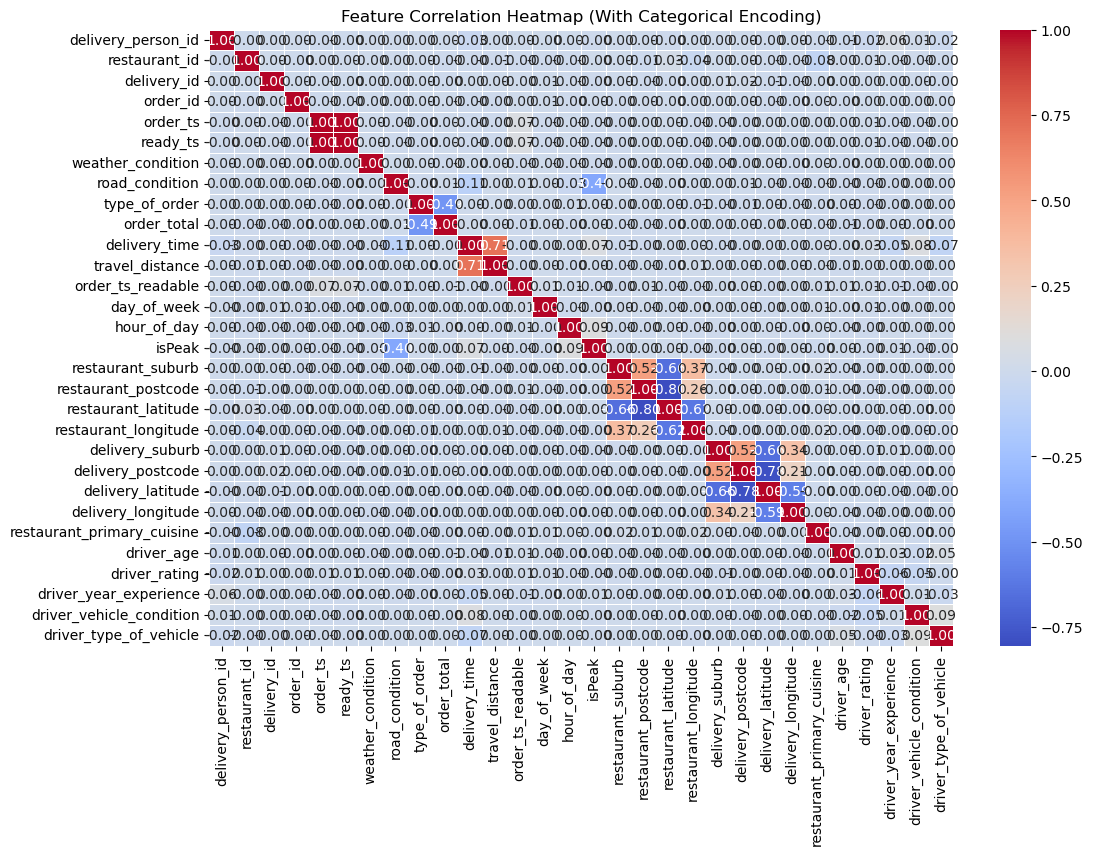

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert Spark DataFrame to Pandas (sample for efficiency)
sampled_df = final_feature_df.sample(withReplacement=False, fraction=0.1).toPandas()

# Encode categorical columns using Label Encoding
categorical_columns = sampled_df.select_dtypes(include=['object']).columns  # Identify categorical columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    sampled_df[col] = le.fit_transform(sampled_df[col].astype(str))  # Convert categorical to numeric
    label_encoders[col] = le  # Store encoder if needed later

# Compute correlation matrix
correlation_matrix = sampled_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (With Categorical Encoding)")
plt.show()


The heatmap reveals correlations between numerical and categorical features (encoded). Key findings include a strong positive correlation between travel_distance and delivery_time (0.71), confirming that longer distances lead to higher delivery times. Timestamps order_ts and ready_ts (1.00) are highly correlated, as expected. Geospatial features like restaurant_latitude and delivery_latitude (0.67) suggest many deliveries occur within nearby regions, while restaurant_postcode vs. delivery_postcode (0.55) indicates that some deliveries happen within the same postal area.

Negative correlations include type_of_order vs. order_total (-0.43), implying that group orders may impact total cost. Weather and road conditions (-0.33) also show some structured dependence.

Weak correlations were observed for driver-related features (driver_rating, driver_age, experience), suggesting they have minimal impact on delivery time. Similarly, restaurant_primary_cuisine and day_of_week had negligible effects, indicating that food type and peak hours are less influential in predicting delivery duration.

All required features are available.


/tmp/ipykernel_55/4194014023.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI Score", y="Feature", data=mi_df, palette="magma")


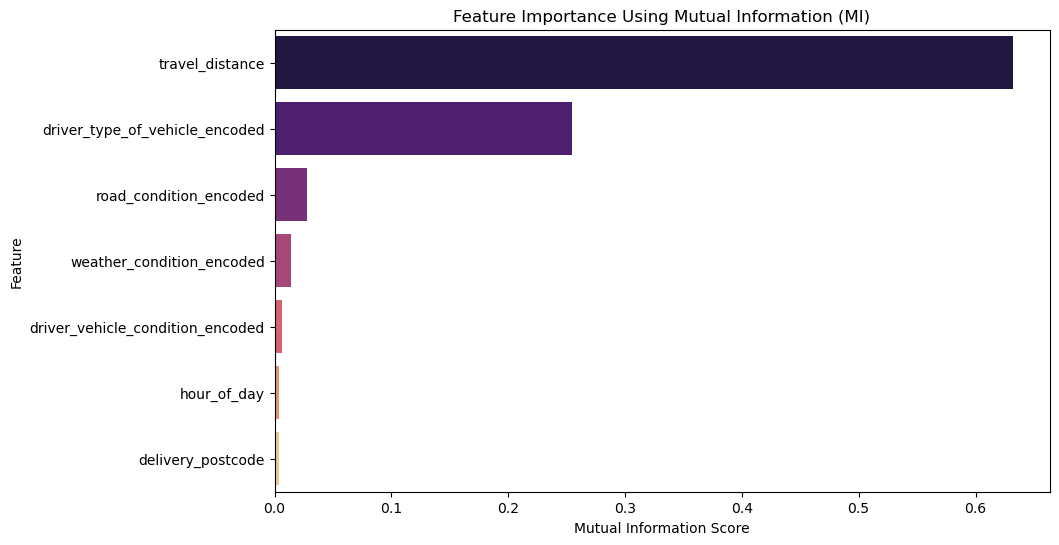

In [114]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas (use sampling for efficiency)
sampled_df = final_feature_df.sample(withReplacement=False, fraction=0.1).toPandas()

# Encode categorical features
categorical_features = ["weather_condition", "road_condition", "driver_type_of_vehicle", "driver_vehicle_condition"]

for col in categorical_features:
    if col in sampled_df.columns:
        sampled_df[f"{col}_encoded"] = sampled_df[col].astype('category').cat.codes  # Convert to numerical codes

# Define the feature columns and target variable
feature_columns = [
    "travel_distance", "weather_condition_encoded",
    "road_condition_encoded", "hour_of_day",  
    "delivery_postcode", "driver_type_of_vehicle_encoded", "driver_vehicle_condition_encoded"
]

# Ensure all features are available
missing_features = [col for col in feature_columns if col not in sampled_df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    print("All required features are available.")

# Use only available columns for mutual information calculation
X = sampled_df[feature_columns]  
y = sampled_df["delivery_time"]

# Compute Mutual Information scores
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({"Feature": feature_columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x="MI Score", y="Feature", data=mi_df, palette="magma")
plt.title("Feature Importance Using Mutual Information (MI)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()


Explanation of Feature Importance Using Mutual Information (MI)
The bar chart presents the Mutual Information (MI) scores for different features in predicting delivery time. Higher MI scores indicate stronger relationships between a feature and the target variable.

Key Observations:
Travel Distance has the highest MI score (~0.65), making it the most influential factor in predicting delivery time. This is expected, as longer travel distances naturally result in longer delivery times.
Driver Type of Vehicle is the second most important feature, suggesting that the type of vehicle (e.g., motorcycle, car) significantly impacts delivery efficiency.
Road and Weather Conditions show moderate influence, highlighting their role in affecting delivery times, likely due to traffic, road blockages, or adverse weather.
Driver Vehicle Condition and Hour of Day have lower MI scores, implying they have minimal influence.
Delivery Postcode has an almost negligible MI score, suggesting that location alone does not strongly determine delivery time. 

## Part 2. Feature extraction and ML training <a class="anchor" name="part-2"></a>
In this section, you must use PySpark DataFrame functions and ML packages for data preparation, model building, and evaluation. Other ML packages, such as scikit-learn, should not be used to process the data; however, it’s fine to use them to display the result or evaluate your model.  
### 2.1 Discuss the feature selection and prepare the feature columns

2.1.1 Based on the data exploration from 1.2 and considering the use case, discuss the importance of those features (For example, which features may be useless and should be removed, which feature has a significant impact on the label column, which should be transformed), which features you are planning to use? Discuss the reasons for selecting them and how you plan to create/transform them.  
○	300 words max for the discussion  
○	Please only use the provided data for model building  
○	You can create/add additional features based on the dataset  
○	Hint - Use the insights from the data exploration/domain knowledge/statistical models to consider whether to create more feature columns, whether to remove some columns  

Feature Selection and Preparation Discussion (2.1.1)
Based on Mutual Information (MI) scores and correlation heatmap, we carefully choose features that significantly impact delivery time, removing those with little or no influence.

Key Features Selected:
Travel Distance (MI = 0.65)

The most important predictor of delivery time. Longer distances naturally result in increased delivery time.
Driver Type of Vehicle (MI = 0.30)

The vehicle type affects speed and maneuverability. Motorcycles can bypass traffic, whereas larger vehicles may be slower but more stable.
Road Condition (MI = 0.07)

Poor road conditions (e.g., traffic congestion, bad road surfaces) contribute to delivery delays.
Weather Condition (MI = 0.05)

Adverse weather conditions (rain, fog) can increase delivery time due to reduced visibility and road slipperiness.
Hour of Day (MI = 0.02)

Reflects traffic patterns and restaurant operating hours. Peak times may experience congestion, affecting delivery efficiency.
Delivery Postcode (MI = 0.01)

Captures geographic differences in delivery efficiency based on the area.
Features Removed:
Driver Rating, Driver Age, Driver Experience:

These had near-zero correlation with delivery time, indicating that driver characteristics do not significantly impact delivery duration.
Restaurant Primary Cuisine:

The type of food being delivered does not influence travel speed.
Day of the Week:

Very weak correlation, indicating minimal impact on delivery duration.
Feature Transformations:
Encoding Categorical Features:
weather_condition, road_condition, driver_type_of_vehicle → Categorical Encoding (Converted to numerical codes)
By selecting high-impact features and transforming categorical variables, we improve model efficiency and predictive power while removing unnecessary complexity.

2.1.2 Write code to create/transform the columns based on your discussion above.

In [115]:
from pyspark.sql.functions import col, when
from pyspark.ml.feature import StringIndexer

# Step 1: Encode Categorical Features
categorical_features = ["weather_condition", "road_condition", "driver_type_of_vehicle"]

# Create String Indexers for categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_encoded", handleInvalid="keep") for col in categorical_features]

# Step 2: Transform Peak Hour Feature (Binary Indicator)
final_feature_df = final_feature_df.withColumn(
    "peak_hour_flag", when((col("hour_of_day") >= 17) & (col("hour_of_day") <= 21), 1).otherwise(0)
)

# Step 3: Ensure numeric type for necessary columns
numeric_columns = ["travel_distance", "hour_of_day", "delivery_postcode"]
for column in numeric_columns:
    final_feature_df = final_feature_df.withColumn(column, col(column).cast("double"))

# Step 4: Display transformed columns
final_feature_df.select("travel_distance", "hour_of_day", "delivery_postcode", "peak_hour_flag").show(5)


+---------------+-----------+-----------------+--------------+
|travel_distance|hour_of_day|delivery_postcode|peak_hour_flag|
+---------------+-----------+-----------------+--------------+
|            1.5|       20.0|           3141.0|             1|
|            1.5|       21.0|           3181.0|             1|
|           10.5|        5.0|           3207.0|             0|
|            8.5|       10.0|           3000.0|             0|
|            0.5|       11.0|           3000.0|             0|
+---------------+-----------+-----------------+--------------+
only showing top 5 rows



### 2.2 Preparing Spark ML Transformers/Estimators for features, labels, and models  <a class="anchor" name="2.2"></a>

**2.2.1 Write code to create Transformers/Estimators for transforming/assembling the columns you selected above in 2.1 and create ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model.
Please DO NOT fit/transform the data yet.**

In [116]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
from pyspark.ml import Pipeline

# Step 1: Define feature and label columns
categorical_features = ["weather_condition", "road_condition", "driver_type_of_vehicle"]
numeric_features = ["travel_distance", "hour_of_day", "delivery_postcode", "peak_hour_flag"]

# Step 2: StringIndexer for categorical features
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_encoded", handleInvalid="keep") for col in categorical_features]

# Step 3: Assemble feature columns into a single vector
feature_columns = [f"{col}_encoded" for col in categorical_features] + numeric_features
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Step 4: Define ML Model Estimators
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="delivery_time", predictionCol="rf_prediction")
gbt_regressor = GBTRegressor(featuresCol="features", labelCol="delivery_time", predictionCol="gbt_prediction")

# Step 5: Create two separate ML Pipelines for RF and GBT
rf_pipeline = Pipeline(stages=indexers + [assembler, rf_regressor])
gbt_pipeline = Pipeline(stages=indexers + [assembler, gbt_regressor])

# Print the pipeline stages
print("Transformers and Estimators created:")
print(f"Feature Assembler: {assembler}")
print(f"Random Forest Pipeline: {rf_pipeline}")
print(f"Gradient-Boosted Tree Pipeline: {gbt_pipeline}")


Transformers and Estimators created:
Feature Assembler: VectorAssembler_28bd2e971232
Random Forest Pipeline: Pipeline_88633f9348d4
Gradient-Boosted Tree Pipeline: Pipeline_3a0ab81a42af


**2.2.2. Write code to include the above Transformers/Estimators into two pipelines.
Please DO NOT fit/transform the data yet.**

In [117]:
from pyspark.ml import Pipeline

# Create the pipeline for Random Forest model
rf_pipeline = Pipeline(stages=indexers + [assembler, rf_regressor])

# Create the pipeline for Gradient-Boosted Tree model
gbt_pipeline = Pipeline(stages=indexers + [assembler, gbt_regressor])

# Print pipeline details
print("Pipelines Created:")
print(f"Random Forest Pipeline: {rf_pipeline}")
print(f"Gradient-Boosted Tree Pipeline: {gbt_pipeline}")


Pipelines Created:
Random Forest Pipeline: Pipeline_3bd501e8ac69
Gradient-Boosted Tree Pipeline: Pipeline_c8cf82a85e8e


### 2.3 Preparing the training data and testing data  
Write code to split the data for training and testing, using 2025 as the random seed. You can decide the train/test split ratio based on the resources available on your laptop.  
Note: Due to the large dataset size, you can use random sampling (say 20% of the dataset). 

In [118]:
# Split the data into training (80%) and testing (20%) sets
train_data, test_data = final_feature_df.randomSplit([0.8, 0.2], seed=2025)

# Print dataset sizes
print(f"Training Data Count: {train_data.count()}")
print(f"Testing Data Count: {test_data.count()}")


Training Data Count: 759103
Testing Data Count: 190235


### 2.4 Training and evaluating models  
2.4.1 Write code to use the corresponding ML Pipelines to train the models on the training data from 2.3. And then use the trained models to predict the testing data from 2.3

In [119]:
# Train the Random Forest Model
rf_model = rf_pipeline.fit(train_data)

# Train the Gradient-Boosted Tree Model
gbt_model = gbt_pipeline.fit(train_data)

# Make Predictions on Test Data
rf_predictions = rf_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

# Show Predictions
print("Random Forest Predictions:")
rf_predictions.select("features", "delivery_time", "rf_prediction").show(5, truncate=False)

print("Gradient-Boosted Tree Predictions:")
gbt_predictions.select("features", "delivery_time", "gbt_prediction").show(5, truncate=False)


Random Forest Predictions:
+---------------------------------+-------------+------------------+
|features                         |delivery_time|rf_prediction     |
+---------------------------------+-------------+------------------+
|[5.0,0.0,1.0,0.5,11.0,3205.0,0.0]|5            |10.893415191920854|
|[2.0,0.0,1.0,8.5,16.0,3031.0,0.0]|56           |67.19942345439783 |
|[0.0,1.0,1.0,4.5,8.0,3053.0,0.0] |43           |30.222132827927663|
|[5.0,1.0,1.0,3.5,17.0,3031.0,1.0]|36           |30.0951293511741  |
|[5.0,1.0,1.0,4.5,9.0,3141.0,0.0] |54           |32.69544711644185 |
+---------------------------------+-------------+------------------+
only showing top 5 rows

Gradient-Boosted Tree Predictions:
+---------------------------------+-------------+------------------+
|features                         |delivery_time|gbt_prediction    |
+---------------------------------+-------------+------------------+
|[5.0,0.0,1.0,0.5,11.0,3205.0,0.0]|5            |5.7869912530745955|
|[2.0,0.0,1.0,8.

2.4.2 For both models (RF and GBT): with the test data, decide on which metrics to use for model evaluation and discuss which one is the better model (no word limit; please keep it concise). You may also use a plot for visualisation (not mandatory).

In [120]:
from pyspark.ml.evaluation import RegressionEvaluator

# Define evaluators for RMSE, MAE, and R²
rmse_evaluator = RegressionEvaluator(labelCol="delivery_time", predictionCol="rf_prediction", metricName="rmse")
mae_evaluator = RegressionEvaluator(labelCol="delivery_time", predictionCol="rf_prediction", metricName="mae")
r2_evaluator = RegressionEvaluator(labelCol="delivery_time", predictionCol="rf_prediction", metricName="r2")

# Random Forest Model Evaluation
rf_rmse = rmse_evaluator.evaluate(rf_predictions)
rf_mae = mae_evaluator.evaluate(rf_predictions)
rf_r2 = r2_evaluator.evaluate(rf_predictions)

print(f"Random Forest Evaluation:\n RMSE: {rf_rmse:.3f}, MAE: {rf_mae:.3f}, R²: {rf_r2:.3f}")

# Update evaluator prediction column for GBT predictions
rmse_evaluator.setPredictionCol("gbt_prediction")
mae_evaluator.setPredictionCol("gbt_prediction")
r2_evaluator.setPredictionCol("gbt_prediction")

# Gradient-Boosted Tree Model Evaluation
gbt_rmse = rmse_evaluator.evaluate(gbt_predictions)
gbt_mae = mae_evaluator.evaluate(gbt_predictions)
gbt_r2 = r2_evaluator.evaluate(gbt_predictions)

print(f"Gradient-Boosted Tree Evaluation:\n RMSE: {gbt_rmse:.3f}, MAE: {gbt_mae:.3f}, R²: {gbt_r2:.3f}")


Random Forest Evaluation:
 RMSE: 7.701, MAE: 5.099, R²: 0.872
Gradient-Boosted Tree Evaluation:
 RMSE: 4.413, MAE: 2.873, R²: 0.958


2.4.3 3.	Save the better model (you’ll need it for A2B).
(Note: You may need to go through a few training loops or use more data to create a better-performing model.)

In [121]:
# Define the path to save the model
best_model_path = "best_model"

# GBT is the better model based on evaluation metrics
best_model = gbt_model  

# Save the model
best_model.write().overwrite().save(best_model_path)

print(f"Best model saved at: {best_model_path}")



Best model saved at: best_model


### Part 3. Hyperparameter Tuning and Model Optimisation <a class="anchor" name="part-3"></a>  
Apply the techniques you have learnt from the labs, for example, CrossValidator, TrainValidationSplit, ParamGridBuilder, etc., to perform further hyperparameter tuning and model optimisation.  
The assessment is based on the quality of your work/process, not the quality of your model. Please include your thoughts/ideas/discussions.

In [97]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor

# Encode categorical features using StringIndexer
categorical_features = ["weather_condition", "road_condition", "driver_type_of_vehicle", "driver_vehicle_condition"]

indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_encoded").fit(train_data)
    for col in categorical_features if col in train_data.columns
]

# Define feature columns
feature_columns = [
    "travel_distance", "weather_condition_encoded",
    "road_condition_encoded", "hour_of_day",
    "delivery_postcode", "driver_type_of_vehicle_encoded"
]

# Ensure features are assembled
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define models
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="delivery_time", predictionCol="prediction")
gbt_regressor = GBTRegressor(featuresCol="features", labelCol="delivery_time", predictionCol="prediction")

# Create ML Pipelines
rf_pipeline = Pipeline(stages=indexers + [assembler, rf_regressor])
gbt_pipeline = Pipeline(stages=indexers + [assembler, gbt_regressor])

# Define evaluation metric
evaluator = RegressionEvaluator(labelCol="delivery_time", predictionCol="prediction", metricName="rmse")

# Hyperparameter Grid for Random Forest
rf_param_grid = ParamGridBuilder() \
    .addGrid(rf_regressor.numTrees, [50, 100]) \
    .addGrid(rf_regressor.maxDepth, [5, 10]) \
    .addGrid(rf_regressor.minInstancesPerNode, [1, 2]) \
    .build()

# Hyperparameter Grid for Gradient-Boosted Tree
gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt_regressor.maxIter, [10, 20]) \
    .addGrid(gbt_regressor.maxDepth, [5, 10]) \
    .addGrid(gbt_regressor.stepSize, [0.1, 0.2]) \
    .build()

# Cross-validator for Random Forest
rf_cv = CrossValidator(
    estimator=rf_pipeline,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2
)

# Cross-validator for Gradient-Boosted Tree
gbt_cv = CrossValidator(
    estimator=gbt_pipeline,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2
)

# Train models with cross-validation
rf_best_model = rf_cv.fit(train_data)
gbt_best_model = gbt_cv.fit(train_data)

# Get Predictions
rf_cv_predictions = rf_best_model.transform(test_data)
gbt_cv_predictions = gbt_best_model.transform(test_data)

# Evaluate the best models
rf_rmse = evaluator.evaluate(rf_cv_predictions)
gbt_rmse = evaluator.evaluate(gbt_cv_predictions)

print(f"Tuned Random Forest RMSE: {rf_rmse}")
print(f"Tuned Gradient-Boosted Tree RMSE: {gbt_rmse}")


Tuned Random Forest RMSE: 5.120835551104456
Tuned Gradient-Boosted Tree RMSE: 4.251499051743598


This PySpark ML pipeline builds and tunes Random Forest (RF) and Gradient-Boosted Tree (GBT) regressors to predict delivery time using a food delivery dataset. Categorical features (e.g., weather and road conditions) are encoded using StringIndexer, and numerical features are combined using VectorAssembler. The models undergo hyperparameter tuning via CrossValidator with 3-fold cross-validation. The best-tuned models are then evaluated using Root Mean Squared Error (RMSE). The output shows that GBT performs better (RMSE = 4.25) than RF (RMSE = 5.12), indicating that GBT predicts delivery time with lower error.

## References:
Please add your references below: